In [7]:
import numpy as np

from matplotlib import pyplot as plt

import pandas as pd

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)

In [8]:
#colors extracted from here: https://twitter.com/NPRougier/status/1323575342204936192/photo/1
ORANGE0 = '#FFF4E6'
ORANGE1 = '#FFE8CC'
ORANGE2 = '#FFD8A8'
ORANGE3 = '#FFC078'
ORANGE4 = '#FFA94D'
ORANGE5 = '#FF922B'
ORANGE6 = '#FD7E14'
ORANGE7 = '#F76707'
ORANGE8 = '#E85900'
ORANGE9 = '#D9480F'
YELLOW0 = '#FFF9DB'
YELLOW1 = '#FFF3BF'
YELLOW2 = '#FFEC99'
YELLOW3 = '#FFE066'
YELLOW4 = '#FFD43B'
YELLOW5 = '#FCC419'
YELLOW6 = '#FAB005'
YELLOW7 = '#F59F00'
YELLOW8 = '#F08000'
YELLOW9 = '#E67700'
LIME0 = '#F4FCE3'
LIME1 = '#E9FAC8'
LIME2 = '#D8F5A2'
LIME3 = '#COEB75'
LIME4 = '#A9E34B'
LIME5 = '#94D82D'
LIME6 = '#82C91E'
LIME7 = '#743816'
LIME8 = '#66A80F'
LIME9 = '#5C940D'
GREEN0 = '#EBFBEE'
GREEN1 = '#D3F9D8'
GREEN2 = '#B2F2BB'
GREEN3 = '#8CE99A'
GREEN4 = '#69DB7C'
GREEN5 = '#51CF66'
GREEN6 = '#40C057'
GREEN7 = '#37B24D'
GREEN8 = '#2F9E44'
GREEN9 = '#2B8A3E'
TEAL0 = '#E6FCF5'
TEAL1 = '#C3FAE8'
TEAL2 = '#96F2D7'
TEAL3 = '#63E6BE'
TEAL4 = '#38D9A9'
TEAL5 = '#20C997'
TEAL6 = '#12B886'
TEAL7 = '#OCA678'
TEAL8 = '#099268'
TEAL9 = '#087F5B'
CYANO = '#E3FAFC'
CYAN1 = '#C5F6FA'
CYAN2 = '#99E9F2'
CYAN3 = '#66D9E8'
CYAN4 = '#3BC9DB'
CYAN5 = '#22B8CF'
CYAN6 = '#15AABF'
CYAN7 = '#1098AD'
CYAN8 = '#0C8599'
CYAN9 = '#0B7285'
BLUE0 = '#E7F5FF'
BLUE1 = '#DOEBFF'
BLUE2 = '#A5D8FF'
BLUE3 = '#74COFC'
BLUE4 = '#4DABF7'
BLUE5 = '#339AFO'
BLUE6 = '#228BE6'
BLUE7 = '#1C7EDO'
BLUE8 = '#1971C2'
BLUE9 = '#1864AB'
INDIGO0 = '#EDF2FF'
INDIGO1 = '#DBE4FF'
INDIGO2 = '#BACOFF'
INDIGO3 = '#91A7EF'
INDIGO4 = '#748FFC'
INDIGO5 = '#5C7CFA'
INDIGO6 = '#4C6EF5'
INDIGO7 = '#4263EB'
INDIGO8 = '#3B5BDB'
INDIGO9 = '#364FC7'
VIOLET0 = '#F3FOFF'
VIOLET1 = '#E5DBFF'
VIOLET2 = '#DOBFFF'
VIOLET3 = '#B197FC'
VIOLET4 = '#9775FA'
VIOLET5 = '#845EF7'
VIOLET6 = '#7950F2'
VIOLET7 = '#7048E8'
VIOLET8 = '#674109'
VIOLET9 = '#5F3DC4'
GRAPE0 = '#F8FOFC'
GRAPE1 = '#F3D9FA'
GRAPE2 = '#EEBEFA'
GRAPE3 = '#E599F7'
GRAPE4 = '#DA77F2'
GRAPE5 = '#CC5DE8'
GRAPE6 = '#BE4BDB'
GRAPE7 = '#AEЗEC9' #fails, misinterpreted as RGBA
GRAPE8 = '#9C36B5'
GRAPE9 = '#862E9C'
PINKO = '#FFF0F6'
PINK1 = '#FFDEEB'
PINK2 = '#FCC2D7'
PINK3 = '#FAA2C1'
PINK4 = '#F783AC'
PINK5 = '#F06595'
PINK6 = '#E64980'
PINK7 = '#D6336C'
PINK8 = '#C2255C'
PINK9 = '#A61E4D'
RED0 = '#FFF5F5'
RED1 = '#FFЕЗЕЗ'
RED2 = '#FFC9C9'
RED3 = '#FFA8A8'
RED4 = '#FF8787'
RED5 = '#FF6B6B'
RED6 = '#FA5252'
RED7 = '#FОЗЕЗЕ' #fails, misinterpreted as RGBA
RED8 = '#E03131'
RED9 = '#C92A2A'
GRAY0 = '#F8F9FA'
GRAY1 = '#F1F3F5'
GRAY2 = '#E9ECEF'
GRAY3 = '#DEE2E6'
GRAY4 = '#CED4DA'
GRAY5 = '#ADB5BD'
GRAY6 = '#868E96'
GRAY7 = '#495057'
GRAY8 = '#343A40'
GRAY9 = '#212529'

In [9]:
SSP = 'ssp434'
geo = 'no_geo'
df = pd.read_csv("antonia_data/co2_{SSP}_{geo}.csv".format(SSP=SSP, geo=geo)).drop(columns='Unnamed: 0')


In [12]:
data_dir = 'antonia_data/'
file_temp = '{var}_{SSP}_{geo}.csv'

SSP_list = ['ssp119','ssp126','ssp434']
geo_list = ['no_geo','geo15']
var_list = ['co2','temp']

pctl_dict = {}
member_dict = {}

peak_co2_dict = {}
years_above_15 = {}

# Loop over all scenarios and vars
for SSP in SSP_list:
    for geo in geo_list:
        for var in var_list:
            
            # load csv into pandas and drop unused column
            df = pd.read_csv(data_dir+file_temp.format(SSP=SSP, geo=geo, var=var)).drop(columns='Unnamed: 0')
            array = df.to_numpy(copy=True) # convert to numpy array
            
            member_dict[var,SSP,geo] = array
            
            # Calculate percentiles
            pctl_list = [5,25,50,75,95]
            percentiles = np.percentile(array,pctl_list,axis=1)
            
            # store in scenario dict
            pctl_dict[var,SSP,geo] = percentiles
            
        #endfor
    #endfor
#endfor

# make an array that lists the years
num_years = array.shape[0]
years = np.array([1750 + idx for idx in range(num_years)])

In [40]:
peak_co2_dict = {}
years_above_15_dict = {}

# Loop over all scenarios and vars
for SSP in SSP_list:
    for geo in geo_list:
        for var in var_list:
            
            array = member_dict[var,SSP,geo]
            
            """
            Peak CO2
            """
            if var == 'co2':
                
                # Find and record the maximum for all members
                peak_co2_dict[SSP,geo] = array.max(axis=0)
            
            """
            Years above 1.5C
            """
            if var == 'temp':
                
                ge_15 = 1.*(array > 1.499)
                years_above_15_dict[SSP,geo] = ge_15.sum(axis=0)
                


(array([  1.,   2.,   1.,  14.,  23.,  72., 188., 360., 327.,  12.]),
 array([-21.07597366, -18.61187502, -16.14777637, -13.68367773,
        -11.21957909,  -8.75548044,  -6.2913818 ,  -3.82728316,
         -1.36318451,   1.10091413,   3.56501277]),
 <BarContainer object of 10 artists>)

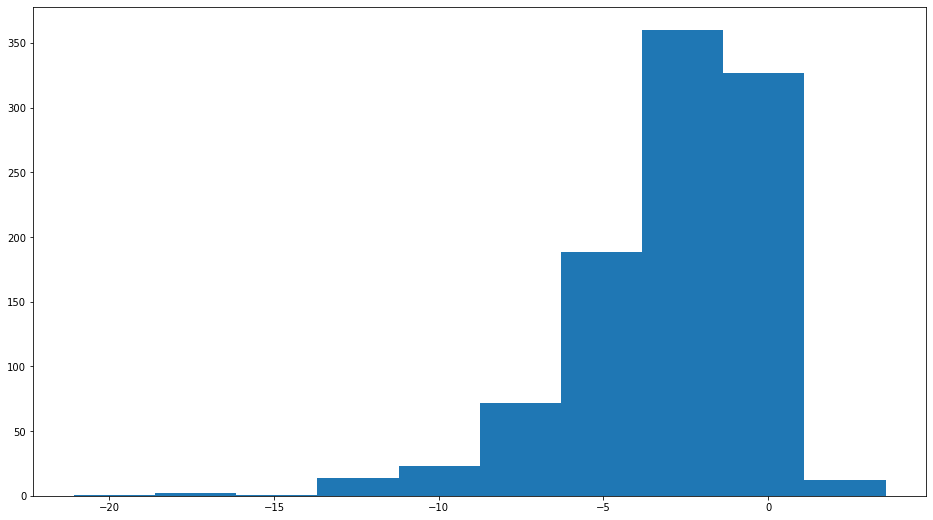

In [41]:
nogeo_peak_co2 = peak_co2_dict['ssp434','no_geo']
geo_peak_co2 = peak_co2_dict['ssp434','geo15']
diff_co2 = geo_peak_co2 - nogeo_peak_co2
plt.hist(diff_co2)

(array([  4.,  11.,  51.,  44., 246., 549.,  54.,  25.,  10.,   6.]),
 array([-10. ,  -8.3,  -6.6,  -4.9,  -3.2,  -1.5,   0.2,   1.9,   3.6,
          5.3,   7. ]),
 <BarContainer object of 10 artists>)

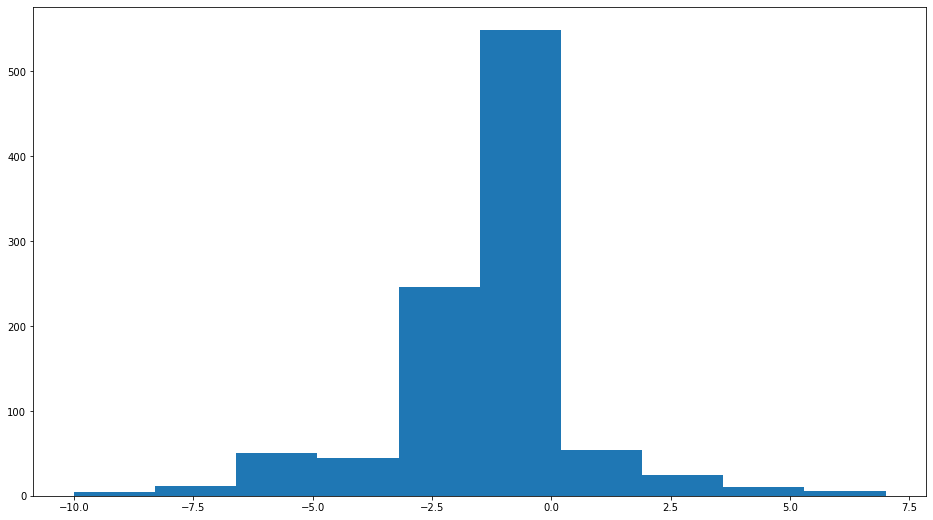

In [42]:
nogeo_years = years_above_15_dict['ssp434','no_geo']
geo_years = years_above_15_dict['ssp434','geo15']
diff_years = geo_years - nogeo_years
plt.hist(diff_years)

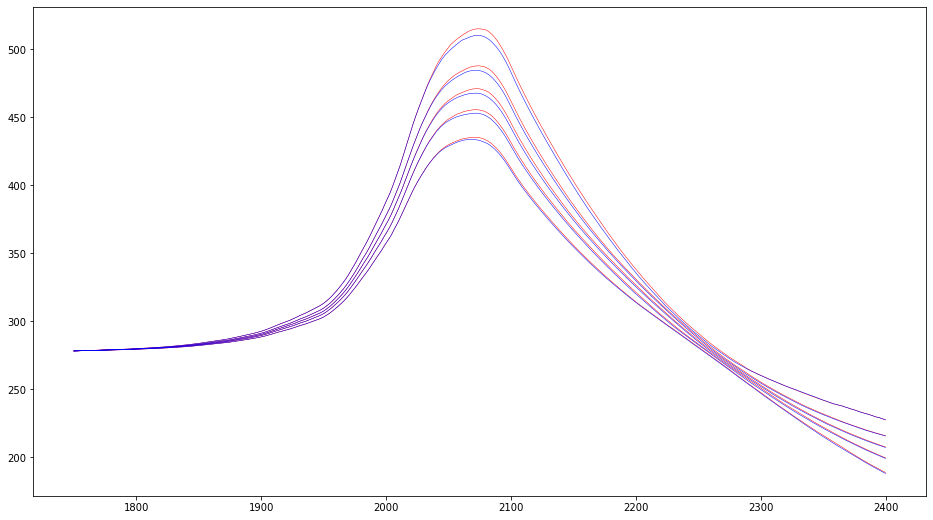

In [43]:
"""
CO2 concentration plot
"""

# members_2_plot = member_dict['co2','ssp434','no_geo']
# for member in range(members_2_plot.shape[1]):
#     plt.plot(years,members_2_plot[:,member],color='0.8',linewidth=0.5)

pctls_2_plot = pctl_dict['co2','ssp434','no_geo']
for pctl in range(pctls_2_plot.shape[0]):
    plt.plot(years,pctls_2_plot[pctl,:],color='r',linewidth=0.5)
    
pctls_2_plot = pctl_dict['co2','ssp434','geo15']
for pctl in range(pctls_2_plot.shape[0]):
    plt.plot(years,pctls_2_plot[pctl,:],color='b',linewidth=0.5)

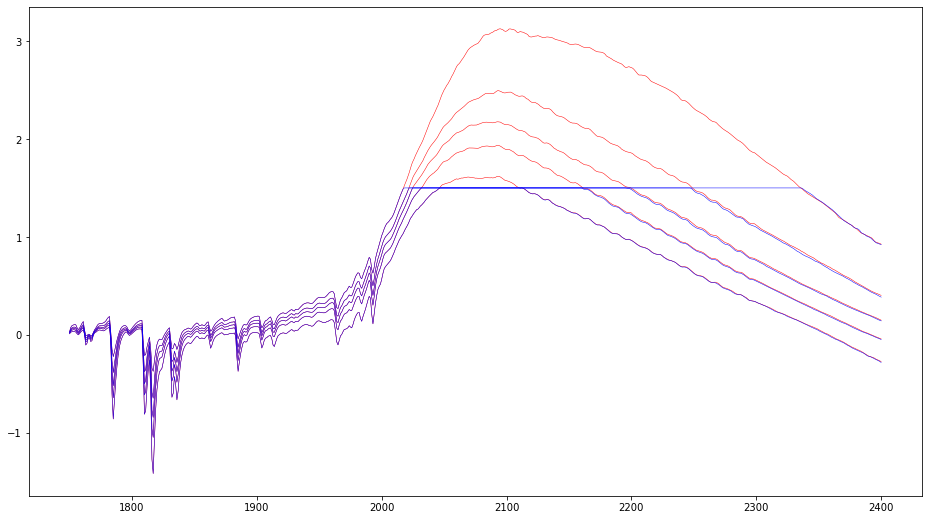

In [16]:
"""
Temp plot
"""

# members_2_plot = member_dict['temp','ssp434','no_geo']
# for member in range(members_2_plot.shape[1]):
#     plt.plot(years,members_2_plot[:,member],color='0.8',linewidth=0.5)

pctls_2_plot = pctl_dict['temp','ssp434','no_geo']
for pctl in range(pctls_2_plot.shape[0]):
    plt.plot(years,pctls_2_plot[pctl,:],color='r',linewidth=0.5)
    
pctls_2_plot= pctl_dict['temp','ssp434','geo15']
for pctl in range(pctls_2_plot.shape[0]):
    plt.plot(years,pctls_2_plot[pctl,:],color='b',linewidth=0.5)